# The Sparks Foundation - GRIPFEB24
## Shreyas Subhash Putty

## Problem 7 - Stock Market Performance Prediction using Hybrid Model trained on Numerical and Textual Analysis data

In [1]:
# Importing the libraries used in the code
import os
from pathlib import Path
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings('ignore')

## Importing and Loading Raw News Data

In [2]:
# Loading the raw news data
news_df_path = os.path.join(r"C:\Users\Shreyas Putty\Datasets_Problem_7", "india-news-headlines.csv")
columns = ['Date','Category','News Text']
news_df = pd.read_csv(news_df_path, names = columns)
news_df

,Date,Category,News Text
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3650966,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650967,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650968,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650969,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


## Cleaning Raw News Data

In [3]:
# Dropping unnecessary data
news_df.drop(0, inplace = True)
news_df.drop('Category', axis = 1, inplace = True)
news_df.head(-5)

,Date,News Text
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3650961,20220331,Garment industry jittery over'GST hike'
3650962,20220331,AAP MLAs interfering in work: Councillors
3650963,20220331,Schools organise vax camps for kids
3650964,20220331,Madhya Pradesh CM Shivraj Singh Chouhan promis...


In [4]:
# Checking for Nan values
news_df.isnull().any()

Date         False
News Text    False
dtype: bool

## Importing and Loading Raw Stocks Data

In [5]:
# Loading the raw stocks data
stocks_df_path = os.path.join(r"C:\Users\Shreyas Putty\Datasets_Problem_7", "BSESN.csv")
stocks_df = pd.read_csv(stocks_df_path)
stocks_df.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0
...,...,...,...,...,...,...,...
242,2020-12-04,44665.910156,45148.281250,44665.910156,45079.550781,45079.550781,27600.0
243,2020-12-07,45099.921875,45458.921875,45024.468750,45426.968750,45426.968750,18700.0
244,2020-12-08,45568.800781,45742.230469,45335.171875,45608.511719,45608.511719,18200.0
245,2020-12-09,45891.039063,46164.101563,45792.011719,46103.500000,46103.500000,20700.0


## Cleaning Raw Stocks Data

In [6]:
# Checking for Nan values
stocks_df.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [7]:
# Dropping the rows with Nan values
stocks_df.dropna(inplace = True)

In [8]:
# Re-checking for Nan values 
stocks_df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
stocks_df.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0
...,...,...,...,...,...,...,...
242,2020-12-04,44665.910156,45148.281250,44665.910156,45079.550781,45079.550781,27600.0
243,2020-12-07,45099.921875,45458.921875,45024.468750,45426.968750,45426.968750,18700.0
244,2020-12-08,45568.800781,45742.230469,45335.171875,45608.511719,45608.511719,18200.0
245,2020-12-09,45891.039063,46164.101563,45792.011719,46103.500000,46103.500000,20700.0


##  Datasets Exploration

In [10]:
# Transforming the date column to right format in news df
news_df["Date"] = pd.to_datetime(news_df["Date"], format = '%Y%m%d')
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   News Text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 83.6+ MB


In [11]:
# Group the news headlines for every day into one in news df
news_df['News Text'] = news_df.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news_df = news_df.drop_duplicates() 
news_df.reset_index(inplace = True, drop = True)
news_df

,Date,News Text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,I will not give in to trends: Dossmode The tim...


In [12]:
# Check for any duplicated values in news df
news_df.isnull().sum()

Date         0
News Text    0
dtype: int64

In [13]:
# Checking the length of the news df
len(news_df)

7717

In [14]:
# Transforming the date column to right format in stocks df
stocks_df["Date"] = pd.to_datetime(stocks_df["Date"], format = '%Y-%m-%d')
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.6 KB


In [15]:
# Transforming the stocks df
stocks_df = stocks_df[["Date","Open","High","Low","Close","Volume"]]
stocks_df

,Date,Open,High,Low,Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,6200.0
...,...,...,...,...,...,...
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,26300.0
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,18400.0
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,16400.0
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,13100.0


In [16]:
# Check for duplicated values in stocks df
stocks_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [17]:
# Checking the length of the stocks df
len(stocks_df)

250

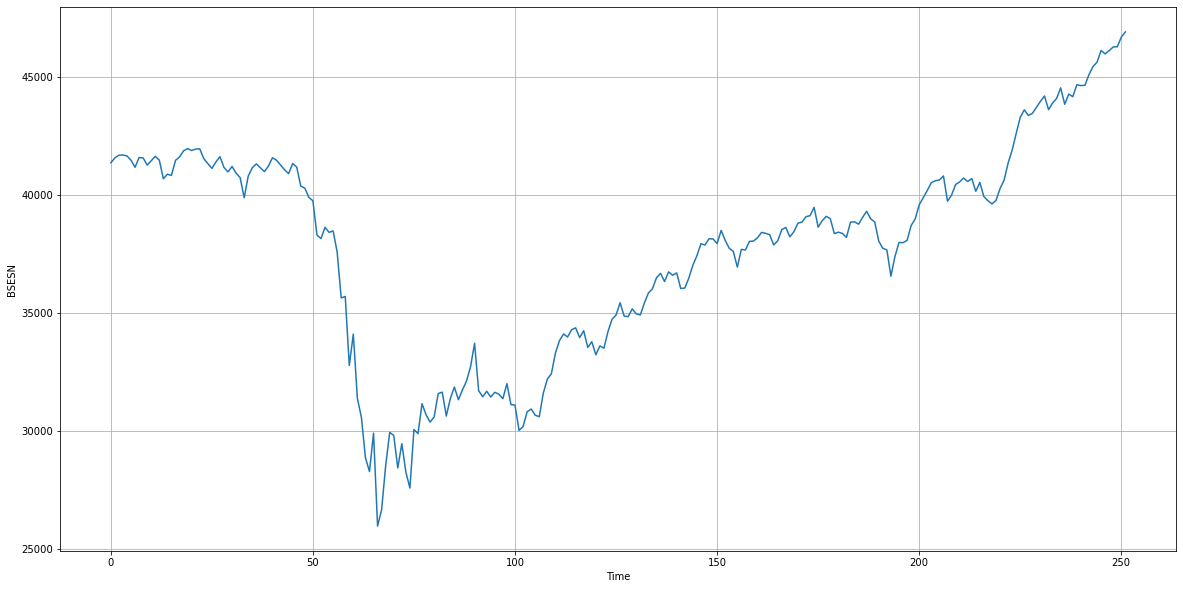

In [18]:
# Plotting the Stocks Close Value
plt.figure(figsize=(20,10))
plt.plot(stocks_df['Close'])
plt.xlabel("Time")
plt.ylabel("BSESN")
plt.grid()
plt.show()

In [19]:
# Removing redundant text characters from news_df
news_df.replace("[^a-zA-Z']", " ", regex = True, inplace = True)
news_df["News Text"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News Text, dtype: object

## Textual Analysis

In [20]:
# Functions to get the subjectivity and polarity of the news text
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [21]:
# Updating news df with news text subjectivity and polarity columns
news_df['Subjectivity'] = news_df['News Text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['News Text'].apply(getPolarity)
news_df

,Date,News Text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954


In [22]:
# Adding sentiment score to news_df
sia = SentimentIntensityAnalyzer()

In [23]:
news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_df['News Text']]
news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_df['News Text']]

In [24]:
news_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_df['News Text']]
news_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_df['News Text']]

In [25]:
news_df

,Date,News Text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162,-0.9999,0.158,0.758,0.084
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.9999,0.160,0.737,0.103
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,-0.9999,0.159,0.755,0.086
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954,-0.9999,0.156,0.769,0.076


## Merging the News and the Stocks Data

In [26]:
merge_df = pd.merge(stocks_df, news_df, how='inner', on='Date')
merge_df

,Date,Open,High,Low,Close,Volume,News Text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,19000.0,After Jagannath Temple Puri beach devpt plan ...,0.356256,0.037977,-1.0000,0.206,0.715,0.079
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,24300.0,What is Citizenship Amendment Bill All...,0.396291,0.039680,-0.9999,0.164,0.754,0.082
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,33300.0,Only of CCA covered after revamp of canals...,0.371783,0.029115,-0.9998,0.135,0.797,0.068
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,33600.0,I'm done playing the good girl I want to be a...,0.366210,0.047456,-0.9999,0.179,0.733,0.088
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,6200.0,Weekly Horoscope December Check predic...,0.393635,0.036077,-0.9999,0.157,0.753,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,26300.0,Ways to get you in the mood for sex when you'r...,0.374037,0.052291,-0.9999,0.168,0.743,0.089
246,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,18400.0,No threat from Covid claims to balance sheets ...,0.382335,0.072333,-0.9996,0.128,0.776,0.095
247,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,16400.0,RT PCR tests in a day only found ve ...,0.368751,0.039336,-0.9999,0.145,0.767,0.089
248,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,13100.0,Asmita Sood's favourite holiday destinations a...,0.427681,0.067088,-0.9997,0.124,0.793,0.083


In [27]:
temp_df = merge_df.drop(["Date", "News Text"], axis = 1)
temp_df

,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,41052.359375,41401.648438,41005.179688,41352.171875,19000.0,0.356256,0.037977,-1.0000,0.206,0.715,0.079
1,41442.750000,41614.769531,41358.468750,41558.570313,24300.0,0.396291,0.039680,-0.9999,0.164,0.754,0.082
2,41571.820313,41719.289063,41456.398438,41673.921875,33300.0,0.371783,0.029115,-0.9998,0.135,0.797,0.068
3,41746.199219,41809.960938,41636.109375,41681.539063,33600.0,0.366210,0.047456,-0.9999,0.179,0.733,0.088
4,41548.261719,41701.621094,41474.609375,41642.660156,6200.0,0.393635,0.036077,-0.9999,0.157,0.753,0.091
...,...,...,...,...,...,...,...,...,...,...,...
245,46060.320313,46309.628906,45706.218750,46099.011719,26300.0,0.374037,0.052291,-0.9999,0.168,0.743,0.089
246,46284.699219,46373.339844,45951.531250,46253.460938,18400.0,0.382335,0.072333,-0.9996,0.128,0.776,0.095
247,46287.390625,46350.300781,45841.671875,46263.171875,16400.0,0.368751,0.039336,-0.9999,0.145,0.767,0.089
248,46573.308594,46704.968750,46402.199219,46666.460938,13100.0,0.427681,0.067088,-0.9997,0.124,0.793,0.083


In [28]:
# Checking for Nan values
temp_df.isnull().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Subjectivity    False
Polarity        False
Compound        False
Negative        False
Neutral         False
Positive        False
dtype: bool

In [29]:
temp_df_cols = temp_df.columns
temp_df_cols

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Subjectivity', 'Polarity',
       'Compound', 'Negative', 'Neutral', 'Positive'],
      dtype='object')

## Splitting the data into Train and Test Data

In [30]:
train_df, test_df = train_test_split(temp_df, test_size = 0.25, random_state = 42)
print(train_df.shape, test_df.shape)

(187, 11) (63, 11)


## Scaling the split data

In [31]:
scaler = MinMaxScaler(feature_range = (-1, 1))

train_scaled_df = scaler.fit_transform(train_df)
test_scaled_df = scaler.transform(test_df)

## Defining the Features and Labels

In [32]:
train_fin_df = pd.DataFrame(train_scaled_df, columns = temp_df_cols)
test_fin_df = pd.DataFrame(test_scaled_df, columns = temp_df_cols)

x_fin_train = train_fin_df.drop('Close', axis = 1)
x_fin_test = test_fin_df.drop('Close', axis = 1)

y_fin_train = train_fin_df["Close"]
y_fin_test = test_fin_df["Close"]

## Preparing Data for Deep Leaning Implementation

In [33]:
# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.FloatTensor(np.array(x_fin_train))
y_train_tensor = torch.FloatTensor(np.array(y_fin_train))
x_test_tensor = torch.FloatTensor(np.array(x_fin_test))
y_test_tensor = torch.FloatTensor(np.array(y_fin_test))
print(x_train_tensor.shape, y_train_tensor.shape)
print(x_test_tensor.shape, y_test_tensor.shape)

torch.Size([187, 10]) torch.Size([187])
torch.Size([63, 10]) torch.Size([63])


In [34]:
# Create DataLoader for training and testing sets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

## Defining the model

In [35]:
# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size  // 2)
        self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.fc4 = nn.Linear(hidden_size // 4, hidden_size // 8)
        self.fc5 = nn.Linear(hidden_size // 8, output_size)
        
        self.lrelu = nn.LeakyReLU()

    def forward(self, x):
        return self.fc5(self.lrelu(self.fc4(self.lrelu(self.fc3(self.lrelu(self.fc2(self.lrelu(self.fc1(x)))))))))

# Training parameters
input_size = x_train_tensor.shape[1]
hidden_size = 32
output_size = 1  # Regression task
num_epochs = 100

# Instantiate the model
model = MLPModel(input_size, hidden_size, output_size)

# Instantiate optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr = 0.0001) # Stochastic Gradient Descent Optimizer
criterion = nn.MSELoss()
# Mean Squared Error for regression problem but Square root for RMSE will be applied during training

## Model Training

In [36]:
def train_epoch(model, train_loader, criterion, optimizer):
    batch_loss = []
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = torch.sqrt(criterion(outputs, targets)) 
        batch_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    
    epoch_loss = np.mean(batch_loss)
    
    return epoch_loss, model

def test_epoch(model, test_loader, criterion):
    batch_loss = []
    model.eval()
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = torch.sqrt(criterion(outputs, targets))
            batch_loss.append(loss.item())
    
    epoch_loss = np.mean(batch_loss)
    
    return epoch_loss, model

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss, model = train_epoch(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    
    if epoch % 2 == 0:
        print(f"Epoch: {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {round(train_loss, 3)}")
    
    test_loss, model = test_epoch(model, test_loader, criterion)
    test_losses.append(test_loss)
              
    if epoch % 2 == 0:
        print(f"Test Loss: {round(test_loss, 3)}")

Epoch: 1/100
Train Loss: 0.624
Test Loss: 0.669
Epoch: 3/100
Train Loss: 0.62
Test Loss: 0.664
Epoch: 5/100
Train Loss: 0.618
Test Loss: 0.66
Epoch: 7/100
Train Loss: 0.6
Test Loss: 0.656
Epoch: 9/100
Train Loss: 0.604
Test Loss: 0.652
Epoch: 11/100
Train Loss: 0.598
Test Loss: 0.648
Epoch: 13/100
Train Loss: 0.605
Test Loss: 0.644
Epoch: 15/100
Train Loss: 0.591
Test Loss: 0.641
Epoch: 17/100
Train Loss: 0.593
Test Loss: 0.637
Epoch: 19/100
Train Loss: 0.583
Test Loss: 0.633
Epoch: 21/100
Train Loss: 0.587
Test Loss: 0.629
Epoch: 23/100
Train Loss: 0.579
Test Loss: 0.626
Epoch: 25/100
Train Loss: 0.586
Test Loss: 0.622
Epoch: 27/100
Train Loss: 0.577
Test Loss: 0.619
Epoch: 29/100
Train Loss: 0.576
Test Loss: 0.615
Epoch: 31/100
Train Loss: 0.564
Test Loss: 0.612
Epoch: 33/100
Train Loss: 0.572
Test Loss: 0.608
Epoch: 35/100
Train Loss: 0.564
Test Loss: 0.605
Epoch: 37/100
Train Loss: 0.559
Test Loss: 0.602
Epoch: 39/100
Train Loss: 0.551
Test Loss: 0.598
Epoch: 41/100
Train Loss: 0.5

## Visualizing the loss plots

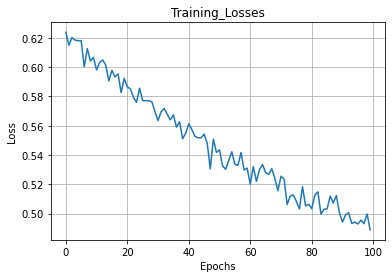

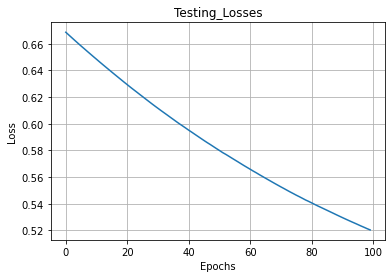

In [37]:
def plot_losses(loss: list, train: bool = True):
       
    task = ['Training' if train else 'Testing'][0]
    
    plt.plot(loss)
    plt.title(f"{task}_Losses")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

plot_losses(train_losses)
plot_losses(test_losses, train = False)